This file contains code to create a basic football shot map using Understat shot data. The pitch is plotted thanks to the mplsoccer library. The data scraping is thanks to Aaron Moniz (@amonizfootball on twitter).

In [ ]:
#import libraries

import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
from mplsoccer.pitch import Pitch, VerticalPitch
import requests

In [36]:
#scraping function 

def understat_single_player(player_id):
    base = "https://understat.com/player/"
    player_id = str(player_id)
    base_url = base + player_id
    url = base_url
    res = requests.get(url)
    soup = BeautifulSoup(res.content,"lxml")

    scripts = soup.find_all('script')
    strings = scripts[3].string

    ind_start = strings.index("('")+2
    ind_end = strings.index("')")

    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')

    data = json.loads(json_data)

    finaldata = pd.DataFrame.from_dict(data)
    
    finaldata["X"] = pd.to_numeric(finaldata["X"])
    finaldata["Y"] = pd.to_numeric(finaldata["Y"])
    finaldata["season"] = pd.to_numeric(finaldata["season"])
    finaldata["minute"] = pd.to_numeric(finaldata["minute"])
    finaldata["xG"] = pd.to_numeric(finaldata["xG"])

    finaldata["X"] = finaldata["X"] * 120
    finaldata["Y"] = finaldata["Y"] * 80

    return finaldata

In [38]:
#data scraping

df = understat_single_player(1250)
df = df[df["season"] == 2021]
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
721,425978,17,SavedShot,108.119998,25.520000,0.063978,Mohamed Salah,a,1250,OpenPlay,2021,RightFoot,16383,Norwich,Liverpool,0,3,2021-08-14 16:30:00,Trent Alexander-Arnold,Pass
722,425982,22,MissedShots,103.439996,29.200000,0.036924,Mohamed Salah,a,1250,OpenPlay,2021,LeftFoot,16383,Norwich,Liverpool,0,3,2021-08-14 16:30:00,Sadio Mané,Cross
723,425987,33,BlockedShot,97.319998,34.800000,0.033030,Mohamed Salah,a,1250,FromCorner,2021,LeftFoot,16383,Norwich,Liverpool,0,3,2021-08-14 16:30:00,None,None
724,426002,73,Goal,101.400000,32.720001,0.047832,Mohamed Salah,a,1250,FromCorner,2021,LeftFoot,16383,Norwich,Liverpool,0,3,2021-08-14 16:30:00,None,None
725,426003,79,MissedShots,102.600000,42.400000,0.057369,Mohamed Salah,a,1250,FromCorner,2021,LeftFoot,16383,Norwich,Liverpool,0,3,2021-08-14 16:30:00,Virgil van Dijk,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,447695,71,BlockedShot,103.319998,24.800000,0.052654,Mohamed Salah,h,1250,OpenPlay,2021,LeftFoot,16533,Liverpool,Aston Villa,1,0,2021-12-11 15:00:00,Sadio Mané,Pass
786,449190,24,Goal,107.880002,33.679999,0.349601,Mohamed Salah,h,1250,OpenPlay,2021,LeftFoot,16544,Liverpool,Newcastle United,3,1,2021-12-16 20:00:00,None,Rebound
787,449193,34,MissedShots,107.880002,32.320001,0.404297,Mohamed Salah,h,1250,OpenPlay,2021,RightFoot,16544,Liverpool,Newcastle United,3,1,2021-12-16 20:00:00,Alex Oxlade-Chamberlain,Chipped
788,449196,58,MissedShots,95.880002,37.120001,0.029461,Mohamed Salah,h,1250,FromCorner,2021,LeftFoot,16544,Liverpool,Newcastle United,3,1,2021-12-16 20:00:00,None,None


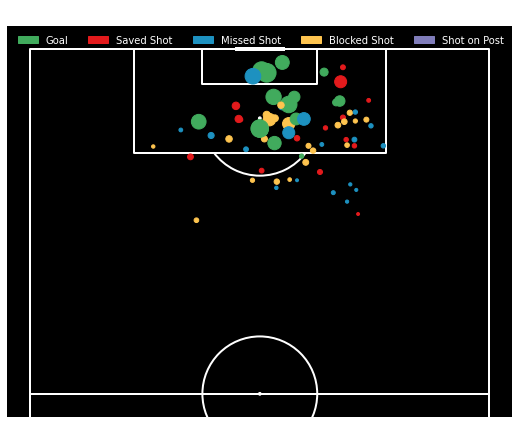

In [62]:
#plotting

colours = {'Goal':'#41ab5d', 'SavedShot':'#e31a1c', 'MissedShots':'#1d91c0', 'BlockedShot':'#fec44f', 'ShotOnPost':'#807dba'}
n = len(colours)

g = mpatches.Patch(color = "#41ab5d", label = "Goal")
ss = mpatches.Patch(color = "#e31a1c", label = "Saved Shot")
ms = mpatches.Patch(color = "#1d91c0", label = "Missed Shot")
bs = mpatches.Patch(color = "#fec44f", label = "Blocked Shot")
sop = mpatches.Patch(color = "#807dba", label = "Shot on Post")

pitch = VerticalPitch(pitch_color='black', line_color='white', stripe=False, half = True, constrained_layout = True)
fig, ax = pitch.draw()
plt.scatter(x = df["Y"], y = df["X"], s = df["xG"] * 400, c = df["result"].map(colours))
plt.gca().invert_xaxis()
plt.title("Mohammed Salah Shot Map (2021/22)", color = "white", size = 18)
leg = plt.legend(handles = [g, ss, ms, bs, sop], frameon = False, loc = "best", ncol = n)

for text in leg.get_texts():
    text.set_color("white") 

fig.set_size_inches(8.5, 6)
plt.savefig("sample.png")
plt.show()